# Определение стоимости автомобилей


## ~~Специалист по Data Science.~~ Специалист по предобработке данных)

## ~~ML-инженер, senior~~ Data Cleaner 80-го уровня


Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

ver. 1 from 20.06
Черновой вариант с моими мыслями, "юмором" и размышлениями. Во второй итерации такого уже не будет!* Ахах. Решил разнообразить проверку, чтобы общение было повеселее.

Привет, ревьювер! Меня зовут Артур, я буду делать этот проект. Если не против, давай общаться на "ты" :) Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!

Цель проекта - не просто сдать проект, а помочь мне сделать мою работу ещё лучше, устранив недочёты и приблизив её к реальным задачам специалиста по работе с данными. Поэтому я стараюсь идти дальше, сильно не расстраиваюсь, если что-то не получилось с первого раза - это нормально, и это поможет мне вырасти!ъъ 

Мне было непросто делать этот проект, потому что я нечётко структурировал задачи и не очень хорошо двигался, очищая данные.

Во второй итерации я почищу "ненужный текст", добавлю оглавление, аккуратно и понятно оформлю уже незамыленным глазом, поправлю желтые и красные пометки, быть может, добавлю новых функций. Ждать ответ, возможно, придется до 23-24, так как надо делать еще мастерскую...

Upd_from_26.06: доделал мастерскую, теперь добавлю фичей, закодирую, модельки и отправлю на проверку)

Upd_from26_06:*(Или будет, если не против)

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px; ">
<b> Комментарий копирайтера</b>
    
Черновой вариант с моими мыслями, "юмором" и размышлениями. Во второй итерации такого уже не будет! Ахах. Решил разнообразить проверку, 
чтобы общение было повеселее.
    
Привет, ревьювер! Меня зовут Артур, я буду делать этот проект. Если не против, давай общаться на "ты" :) 
Но если это неудобно, обязательно дай знать, и мы придумаем что-нибудь ещё!


    
**Ответы на мои комментарии или доработки по моим рекомендациям попрошу выделить каким-нибудь цветом.**
Также я попрошу тебя **не менять и не передвигать мои комментарии**, чтобы при последующей проверке мне было проще ориентироваться))0
    
    
<font color= 'dodgerblue'>**По проекту:**</font> работа сделана очень хорошо, все оформлено аккуратно и понятно. Код легко читается и сопровождается выводами, что очень важно!! Функции написаны верно, модели обучены корректно. Во время выполнения проекта у меня остались некоторые вопросы. Посмотри, пожалуйста, мои комментарии, возможно, я выделю их цветом. <div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">

Желтым с пометкой ⚠️ отмечено то, что можно или нужно оптимизировать, в зависимости от контекста.</div>    

Вот это удалить: "Там же ты также найдешь рекомендации по улучшению проекта. Буду ждать работу на повторное ревью."
</div>

# Project: Предсказываем чиселку price у автомобиля

## Цель исследования

Определение рыночной стоимости автомобилей

## Бизнес-задача
1. Построить модель для прогнозирования рыночной стоимости автомобиля
2. Качество предсказания (значение метрики RMSE должно быть меньше 2500)
3. оптимальное время обучения модели
4. оптимальное время предсказания модели.



## Подготовка данных

In [126]:
!pip install lightgbm


In [127]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns


CURRENT_YEAR = 2018

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge


from sklearn.metrics import mean_squared_error, r2_score

In [128]:
path1 = '/datasets/autos.csv'
path2 = '../../autos.csv'

if os.path.exists(path1):
    data = pd.read_csv(path1)
elif os.path.exists(path2):
    data = pd.read_csv(path2)
else:
    print('something is wrong')
    


In [129]:
data.head(5)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Данные загружены успешно и без ошибок

In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Явные пропуски есть в столбцах:
* VehicleType – тип автомобильного кузова
* Gearbox — тип коробки передач
* Model – модель автомобиля
* FuelType – тип топлива
* Repaired – была машина в ремонте или нет


Для начала я бы спросил у старшего, чем лучше заполнить пропуски и предложил бы свои мысли. Так как старшего нет, то сразу будем придерживаться плана.

**План такой.** 
VehicleType: заполняем пропуски модой по Brand/Model. 
Альтернатива: если модель отсутствует, можно fallback на моду по Brand, либо просто 'other'.

Model: заполняем модой по Brand, fallback → 'other1' или 'other'

Gearbox: заполняем модой по VehicleType (если есть), или просто глобальной модой.
Важно для цены, но менее точно привязано к бренду/модели.

Repaired: часто утаивается умышленно → NaN тут может иметь значение само по себе.
Заполнить 'unknown'.


In [131]:
Model_counts_before = data['Model'].value_counts(dropna=False)

In [132]:
# Находим наиболее частую Model для каждой Brand
model_by_brand = data.groupby('Brand')['Model'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else 'other'
)


In [133]:
# Заполняем пропуски в Model на основе Brand
data['Model'] = data['Model'].fillna(data['Brand'].map(model_by_brand))

In [134]:
Model_counts = data['Model'].value_counts(dropna=False)


In [135]:
# Сравнение
comparison = pd.concat([Model_counts_before, Model_counts], axis=1)
comparison.columns = ['Before', 'After']
comparison['Change'] = comparison['After'] - comparison['Before']
comparison['Ratio'] = (comparison['After'] / comparison['Before'] * 100 - 100).round(2)
comparison.sort_values(by='Ratio', ascending=False).head(14)


,Before,After,Change,Ratio
Model,,,,
601,419,514.0,95.0,22.67
156,629,766.0,137.0,21.78
impreza,225,269.0,44.0,19.56
i_reihe,1226,1454.0,228.0,18.60
2_reihe,4816,5707.0,891.0,18.50
colt,869,1029.0,160.0,18.41
cayenne,232,274.0,42.0,18.10
focus,5874,6887.0,1013.0,17.25
other,24421,28605.0,4184.0,17.13


In [136]:
comparison.head()

,Before,After,Change,Ratio
Model,,,,
golf,29232,32737.0,3505.0,11.99
other,24421,28605.0,4184.0,17.13
3er,19761,21696.0,1935.0,9.79
NaN,19705,NaN,NaN,NaN
polo,13066,13066.0,0.0,0.00


In [137]:
#data['Model'] = data['Model'].replace('other1', 'other')

Заполним пропуски:

In [138]:
# До заполнения
vehicle_counts_before = data['VehicleType'].value_counts(dropna=False)

# Заполнение VehicleType модой по по модели
vehicle_modes_by_model = data.groupby('Model')['VehicleType'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else pd.Na
)
data['VehicleType'] = data['VehicleType'].fillna(data['Model'].map(vehicle_modes_by_model))

# После заполнения
vehicle_counts_after = data['VehicleType'].value_counts(dropna=False)




In [139]:
# Сравнение
comparison = pd.concat([vehicle_counts_before, vehicle_counts_after], axis=1)
comparison.columns = ['Before', 'After']
comparison['Change'] = comparison['After'] - comparison['Before']
comparison['Ratio'] = (comparison['After'] / comparison['Before'] * 100 - 100).round(2)

comparison.head(7)

,Before,After,Change,Ratio
VehicleType,,,,
sedan,91457,109944.0,18487.0,20.21
small,79831,90343.0,10512.0,13.17
wagon,65166,69397.0,4231.0,6.49
NaN,37490,NaN,NaN,NaN
bus,28775,31882.0,3107.0,10.80
convertible,20203,20458.0,255.0,1.26
coupe,16163,16555.0,392.0,2.43


Заполним пропуски в Gearbox:

In [140]:
Gearbox_counts_before = data['Gearbox'].value_counts(dropna=False)

# 1. Находим моду Gearbox для каждого Model
gearbox_mode_by_vtype = (
    data.groupby('Model')['Gearbox']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)
)

# 2. Заполняем пропуски в Gearbox модой по Model
data['Gearbox'] = data['Gearbox'].fillna(data['Model'].map(gearbox_mode_by_vtype))

# 3. После заполнения
Gearbox_counts_after = data['Gearbox'].value_counts(dropna=False)

# 4. Сравнение
comparison = pd.concat([Gearbox_counts_before, Gearbox_counts_after], axis=1)
comparison.columns = ['Before', 'After']
comparison['Change'] = comparison['After'] - comparison['Before']
comparison['Ratio'] = (comparison['After'] / comparison['Before'] * 100 - 100).round(2)

In [141]:
comparison

,Before,After,Change,Ratio
Gearbox,,,,
manual,268251,286286.0,18035.0,6.72
auto,66285,68083.0,1798.0,2.71
NaN,19833,NaN,NaN,NaN


Заполним пропуски в FuelType:

In [142]:

fuel_counts_before = data['FuelType'].value_counts(dropna=False)

# 1. Находим моду FuelType по Model
fuel_mode_by_model = data.groupby('Model')['FuelType'].agg(
    lambda x: x.mode().iloc[0] if not x.mode().empty else pd.NA
)

# 2. Заполняем пропуски 
data['FuelType'] = data['FuelType'].fillna(data['Model'].map(fuel_mode_by_model))

# 3. Сохраняем распределение после заполнения
fuel_counts_after = data['FuelType'].value_counts(dropna=False)



In [143]:
# 3. Сравнение
comparison = pd.concat([fuel_counts_before, fuel_counts_after], axis=1)
comparison.columns = ['Before', 'After']
comparison['Change'] = comparison['After'] - comparison['Before']
comparison['Ratio'] = (comparison['After'] / comparison['Before'] * 100 - 100).round(2)
comparison.sort_values(by='Ratio', ascending=False)


,Before,After,Change,Ratio
FuelType,,,,
petrol,216352,243956.0,27604.0,12.76
gasoline,98720,104011.0,5291.0,5.36
lpg,5310,5310.0,0.0,0.00
cng,565,565.0,0.0,0.00
hybrid,233,233.0,0.0,0.00
other,204,204.0,0.0,0.00
electric,90,90.0,0.0,0.00
NaN,32895,NaN,NaN,NaN


Заполним пропуски в Repaired:

In [144]:
data['Repaired'] = data['Repaired'].fillna('unknown')


In [145]:
data['Repaired'].value_counts(dropna=False)

Repaired
no         247161
unknown     71154
yes         36054
Name: count, dtype: int64

Проверим теперь данные на неявные пропуски/некорректные значения:

In [146]:
# Заметил уже в конце предобработки в Brand: rover и land_rover. Их можно объединить в одну компанию, нашел инфу, что это одно и то же.
data.Brand.unique()

array(['volkswagen', 'audi', 'jeep', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'seat',
       'citroen', 'honda', 'fiat', 'mini', 'smart', 'hyundai',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'suzuki', 'lancia', 'toyota', 'chevrolet', 'dacia',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'rover', 'land_rover', 'lada'], dtype=object)

In [147]:
data["Brand"] = data["Brand"].replace("rover", "land_rover")

In [148]:
data.shape[0]

354369

In [149]:
data.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,sedan,1993,manual,0,golf,150000,0,petrol,volkswagen,unknown,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,a4,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,unknown,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [150]:
data.NumberOfPictures.unique()

array([0])

In [151]:
# почтовый индекс владельца анкеты (пользователя)
data.PostalCode.nunique()

8143

In [152]:
# то есть 8143 разных человека на 354 000 объявлений? Интересно, нужен ли нам почтовый индекс?

In [153]:
data.PostalCode.unique()

array([70435, 66954, 90480, ..., 38528, 38325, 31096])

In [154]:
data = data.drop(columns=['NumberOfPictures']) # Тут одни нули, поэтому дропаем

In [155]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        354369 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            354369 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              354369 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           354369 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           354369 non-null  object
 12  DateCreated        354369 non-null  object
 13  PostalCode         354369 non-null  int64 
 14  LastSeen           354369 non-null  object
dtypes: int64(6), object(9)
memory usage: 40.6+ MB


In [156]:
# Преобразование столбцов в Datetime
data['DateCreated'] = pd.to_datetime(data['DateCreated'])
data['DateCrawled'] = pd.to_datetime(data['DateCrawled'])
data['LastSeen'] = pd.to_datetime(data['LastSeen'])

In [157]:
# Преобразование DateCreated без времени 00:00:00
data['DateCreated'] = pd.to_datetime(data['DateCreated']).dt.date
data['DateCreated'] = pd.to_datetime(data['DateCreated'])


In [158]:
data.query('Price == 0')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21,19348,2016-03-25 16:47:58
40,2016-03-26 22:06:17,0,small,1990,manual,0,corsa,150000,1,petrol,opel,unknown,2016-03-26,56412,2016-03-27 17:43:34
111,2016-03-19 18:40:12,0,sedan,2017,manual,0,golf,5000,12,petrol,volkswagen,unknown,2016-03-19,21698,2016-04-01 08:47:05
115,2016-03-20 18:53:27,0,small,1999,manual,0,golf,5000,0,petrol,volkswagen,unknown,2016-03-20,37520,2016-04-07 02:45:22
152,2016-03-11 18:55:53,0,bus,2004,manual,101,meriva,150000,10,lpg,opel,yes,2016-03-11,27432,2016-03-12 23:47:10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354205,2016-03-09 15:56:30,0,small,2000,manual,65,corsa,150000,0,petrol,opel,yes,2016-03-09,23758,2016-03-30 11:16:08
354238,2016-03-20 14:55:07,0,small,2002,manual,60,fiesta,150000,3,petrol,ford,unknown,2016-03-20,33659,2016-04-06 18:45:23
354248,2016-03-24 13:48:05,0,small,1999,manual,53,swift,150000,3,petrol,suzuki,unknown,2016-03-24,42329,2016-04-07 05:17:24
354277,2016-03-10 22:55:50,0,small,1999,manual,37,arosa,150000,7,petrol,seat,yes,2016-03-10,22559,2016-03-12 23:46:32


Ух ты, бесплатные машины! дайте две!

In [159]:
zero_price = data[data['Price'] == 0]
zero_price.describe()

,DateCrawled,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,DateCreated,PostalCode,LastSeen
count,10772,10772.0,10772.000000,10772.000000,10772.000000,10772.000000,10772,10772.000000,10772
mean,2016-03-21 14:36:28.390178048,0.0,2008.848403,81.200056,124177.961381,3.697271,2016-03-20 22:15:19.717786880,44937.204790,2016-03-28 16:15:04.602023680
min,2016-03-05 14:06:50,0.0,1000.000000,0.000000,5000.000000,0.000000,2016-01-26 00:00:00,1069.000000,2016-03-05 15:17:56
25%,2016-03-13 15:48:17,0.0,1996.000000,0.000000,125000.000000,0.000000,2016-03-13 00:00:00,25336.750000,2016-03-21 11:54:36.500000
50%,2016-03-21 19:56:36.500000,0.0,2000.000000,75.000000,150000.000000,2.000000,2016-03-21 00:00:00,42855.000000,2016-03-31 20:47:31
75%,2016-03-29 12:57:47.750000128,0.0,2005.000000,120.000000,150000.000000,7.000000,2016-03-29 00:00:00,63668.750000,2016-04-06 04:16:58
max,2016-04-07 14:36:45,0.0,9999.000000,15016.000000,150000.000000,12.000000,2016-04-07 00:00:00,99996.000000,2016-04-07 14:58:50
std,NaN,0.0,267.729824,235.273205,48423.379468,4.046864,NaN,26395.784541,NaN


In [160]:
zero_price['Model'].value_counts()

Model
golf        1378
other       1314
3er          789
corsa        558
polo         438
            ... 
gl             1
verso          1
serie_3        1
delta          1
b_klasse       1
Name: count, Length: 222, dtype: int64

In [161]:
zero_price['RegistrationYear'].value_counts()

RegistrationYear
2000    1418
1999     733
1998     721
1997     675
1995     654
        ... 
3000       1
1935       1
1200       1
1933       1
3500       1
Name: count, Length: 96, dtype: int64

In [162]:
# Получаем уникальные года
data['DateCreated'].dt.year.unique()


array([2016, 2015, 2014], dtype=int32)

In [163]:
#3   RegistrationYear   354369 non-null  int64
data.RegistrationYear.nunique()

151

In [164]:
data.RegistrationYear.unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1982, 1976, 1983, 1973, 1111, 1969, 1971, 1987, 1986,
       1988, 1970, 1965, 1945, 1925, 1974, 1979, 1955, 1978, 1972, 1968,
       1977, 1961, 1960, 1966, 1975, 1963, 1964, 5000, 1954, 1958, 1967,
       1959, 9999, 1956, 3200, 1000, 1941, 8888, 1500, 2200, 4100, 1962,
       1929, 1957, 1940, 3000, 2066, 1949, 2019, 1937, 1951, 1800, 1953,
       1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911, 1933, 1400, 1950,
       4000, 1948, 1952, 1200, 8500, 1932, 1255, 3700, 3800, 4800, 1942,
       7000, 1935, 1936, 6500, 1923, 2290, 2500, 1930, 1001, 9450, 1944,
       1943, 1934, 1938, 1688, 2800, 1253, 1928, 1919, 5555, 5600, 1600,
       2222, 1039, 9996, 1300, 8455, 1931, 1915, 4500, 1920, 1602, 7800,
       9229, 1947, 1927, 7100, 8200, 1946, 7500, 35

Ух ты, машины из 5900 года и выше. Даже есть машины из 1111.

Посмотрим сколько машин младше 2016 года:

In [165]:
data.query('RegistrationYear > 2016') 

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
22,2016-03-23 14:52:51,2900,bus,2018,manual,90,meriva,150000,5,petrol,opel,no,2016-03-23,49716,2016-03-31 01:16:33
26,2016-03-10 19:38:18,5555,sedan,2017,manual,125,c4,125000,4,gasoline,citroen,no,2016-03-10,31139,2016-03-16 09:16:46
48,2016-03-25 14:40:12,7750,sedan,2017,manual,80,golf,100000,1,petrol,volkswagen,unknown,2016-03-25,48499,2016-03-31 21:47:44
51,2016-03-07 18:57:08,2000,small,2017,manual,90,punto,150000,11,gasoline,fiat,yes,2016-03-07,66115,2016-03-07 18:57:08
57,2016-03-10 20:53:19,2399,sedan,2018,manual,64,other,125000,3,petrol,seat,no,2016-03-10,33397,2016-03-25 10:17:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354112,2016-03-11 15:49:51,3600,bus,2017,manual,86,transit,150000,5,gasoline,ford,unknown,2016-03-11,32339,2016-03-12 05:45:02
354140,2016-03-29 16:47:29,1000,wagon,2017,manual,101,a4,150000,9,gasoline,audi,unknown,2016-03-29,38315,2016-04-06 02:44:27
354203,2016-03-17 00:56:26,2140,small,2018,manual,80,fiesta,150000,6,petrol,ford,no,2016-03-17,44866,2016-03-29 15:45:04
354253,2016-03-25 09:37:59,1250,small,2018,manual,0,corsa,150000,0,petrol,opel,unknown,2016-03-25,45527,2016-04-06 07:46:13


Интересно, как такое возможно, если анкета создана в 2016?
А сколько машин младше 2025?

In [166]:
data.query('RegistrationYear >=2025')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
12946,2016-03-29 18:39:40,49,sedan,5000,manual,0,golf,5000,12,petrol,volkswagen,unknown,2016-03-29,74523,2016-04-06 04:16:14
15147,2016-03-14 00:52:02,0,sedan,9999,manual,0,other,10000,0,petrol,sonstige_autos,unknown,2016-03-13,32689,2016-03-21 23:46:46
15870,2016-04-02 11:55:48,1700,sedan,3200,manual,0,other,5000,0,petrol,sonstige_autos,unknown,2016-04-02,33649,2016-04-06 09:46:13
17271,2016-03-23 16:43:29,700,sedan,9999,manual,0,other,10000,0,petrol,opel,unknown,2016-03-23,21769,2016-04-05 20:16:15
17346,2016-03-06 16:06:20,6500,sedan,8888,manual,0,other,10000,0,petrol,sonstige_autos,unknown,2016-03-06,55262,2016-03-30 20:46:55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334967,2016-03-20 17:53:51,12000,sedan,4000,manual,500,golf,5000,0,petrol,volkswagen,no,2016-03-20,57392,2016-04-07 00:46:30
335727,2016-03-09 07:01:27,0,sedan,7500,manual,0,other,10000,0,petrol,mini,no,2016-03-09,9669,2016-03-19 19:44:50
338829,2016-03-24 19:49:36,50,sedan,3000,manual,3000,golf,100000,6,petrol,volkswagen,yes,2016-03-24,23992,2016-04-03 13:17:57
340548,2016-04-02 17:44:03,0,sedan,3500,manual,75,other,5000,3,petrol,sonstige_autos,unknown,2016-04-02,96465,2016-04-04 15:17:51


Парни, да вы издеваетесь! И что же мне с этим делать?

In [167]:
data.shape[0] # 1% – 3543 rows

354369

Думаю, я могу суммарно удалить до 1% без потери качества.

In [168]:
data = data[data['RegistrationYear'] < 2025] # 105 rows


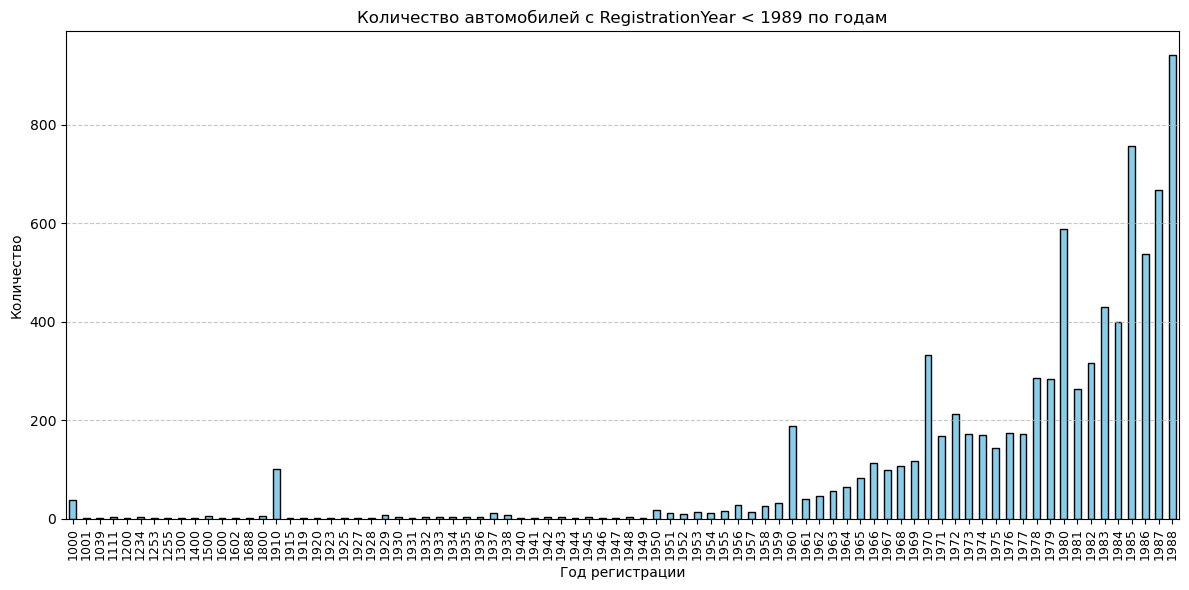

In [169]:

filtered = data.query('RegistrationYear < 1989')

year_counts = filtered['RegistrationYear'].value_counts().sort_index()

plt.figure(figsize=(12,6))
year_counts.plot(kind='bar', color='skyblue', edgecolor='black')

plt.title('Количество автомобилей с RegistrationYear < 1989 по годам')
plt.xlabel('Год регистрации')
plt.ylabel('Количество')
plt.xticks(rotation=90, fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [170]:
data.query('RegistrationYear == 1910')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
15,2016-03-11 21:39:15,450,small,1910,manual,0,ka,5000,0,petrol,ford,unknown,2016-03-11,24148,2016-03-19 08:46:47
6629,2016-04-02 13:47:16,0,small,1910,manual,0,other,5000,1,other,sonstige_autos,unknown,2016-04-02,93105,2016-04-04 11:16:30
6977,2016-03-24 08:37:22,135,small,1910,manual,0,corsa,5000,0,petrol,opel,unknown,2016-03-24,19374,2016-04-06 20:46:08
10183,2016-03-27 13:59:08,1250,sedan,1910,manual,0,other,5000,0,petrol,audi,unknown,2016-03-27,18445,2016-04-07 10:45:31
18023,2016-03-24 08:57:13,1,sedan,1910,manual,0,golf,5000,0,petrol,volkswagen,unknown,2016-03-24,50829,2016-04-06 22:45:09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331076,2016-03-26 03:29:46,0,sedan,1910,manual,0,other,5000,1,petrol,sonstige_autos,unknown,2016-03-25,35606,2016-03-29 08:15:17
333004,2016-03-20 14:57:29,0,suv,1910,manual,0,yaris,5000,0,petrol,toyota,unknown,2016-03-20,48683,2016-03-20 14:57:29
334901,2016-03-29 03:36:18,1300,wagon,1910,manual,0,a4,5000,9,gasoline,audi,unknown,2016-03-29,82256,2016-04-05 17:25:59
343083,2016-04-01 08:51:08,1,other,1910,manual,0,golf,5000,1,other,volkswagen,unknown,2016-04-01,18273,2016-04-07 05:44:39


In [171]:
len(data.query('RegistrationYear <= 1959'))

422

Удаляем всё до 1959 года включительно...

In [172]:
data = data[data['RegistrationYear'] > 1959] # 422 + 105 rows


In [173]:
data.query('RegistrationYear >= 2018')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
22,2016-03-23 14:52:51,2900,bus,2018,manual,90,meriva,150000,5,petrol,opel,no,2016-03-23,49716,2016-03-31 01:16:33
57,2016-03-10 20:53:19,2399,sedan,2018,manual,64,other,125000,3,petrol,seat,no,2016-03-10,33397,2016-03-25 10:17:37
163,2016-04-04 12:57:02,1200,sedan,2018,manual,75,astra,150000,0,petrol,opel,no,2016-04-04,15344,2016-04-06 14:45:26
196,2016-03-24 13:51:03,2800,small,2018,manual,75,twingo,125000,12,petrol,renault,no,2016-03-24,86199,2016-04-07 05:17:27
355,2016-03-12 19:00:11,1050,sedan,2018,manual,0,golf,150000,0,petrol,volkswagen,unknown,2016-03-12,53567,2016-04-07 10:44:48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353918,2016-04-04 02:36:35,999,sedan,2018,manual,0,golf,150000,8,petrol,volkswagen,no,2016-04-04,35767,2016-04-05 12:13:17
353971,2016-04-07 08:36:16,1670,small,2018,manual,0,twingo,90000,0,petrol,renault,no,2016-04-07,12167,2016-04-07 08:36:16
354007,2016-04-04 21:40:20,10980,sedan,2018,manual,75,golf,20000,1,petrol,volkswagen,no,2016-04-04,44801,2016-04-07 00:15:36
354203,2016-03-17 00:56:26,2140,small,2018,manual,80,fiesta,150000,6,petrol,ford,no,2016-03-17,44866,2016-03-29 15:45:04


In [174]:
len(data.query('RegistrationYear >= 2019'))

25

Вручную разобрался где выбросы. После 2018 года. Как так выходит что анкета 2016 года, а машина 2018? Еще одна загадка.

In [175]:
data = data[data['RegistrationYear'] <= 2018] # 130 + 422 + 105 rows


Фух, теперь-то осталось разобраться с нулевой мощностью, нулевой ценой и еще чем-нибудь))

In [176]:
len(data.query('Power == 0'))

39890

Жесть, и что делать? Предлагаю заполнить медианным значением по модели автомобиля и году. Возьмем и сложим все гольфы до 1993 года включительно и найдем медиану.

In [177]:
# Подготовим df, где Power > 30
power_data = data[data['Power'] > 30]

# Считаем медиану Power по Model + RegistrationYear (группировка по двум признакам)
median_power_by_model_year = power_data.groupby(['Model', 'RegistrationYear'])['Power'].median()

# Если нет точного совпадения Model+Year — используем просто медиану по Model
median_power_by_model = power_data.groupby('Model')['Power'].median()

# Функция: выбираем медиану для строки
def get_filled_power(row):
    if row['Power'] > 30:
        return row['Power']
    
    key = (row['Model'], row['RegistrationYear'])
    if key in median_power_by_model_year:
        return median_power_by_model_year[key]
    elif row['Model'] in median_power_by_model:
        return median_power_by_model[row['Model']]
    else:
        return np.nan

# Применяем быстро через apply (без фильтрации внутри)
data['Power'] = data.apply(get_filled_power, axis=1)

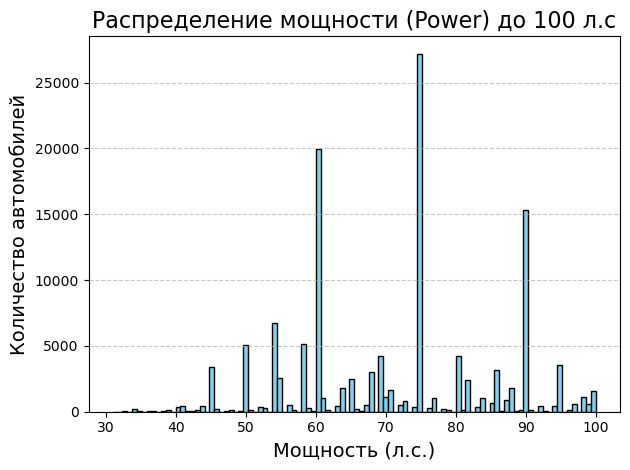

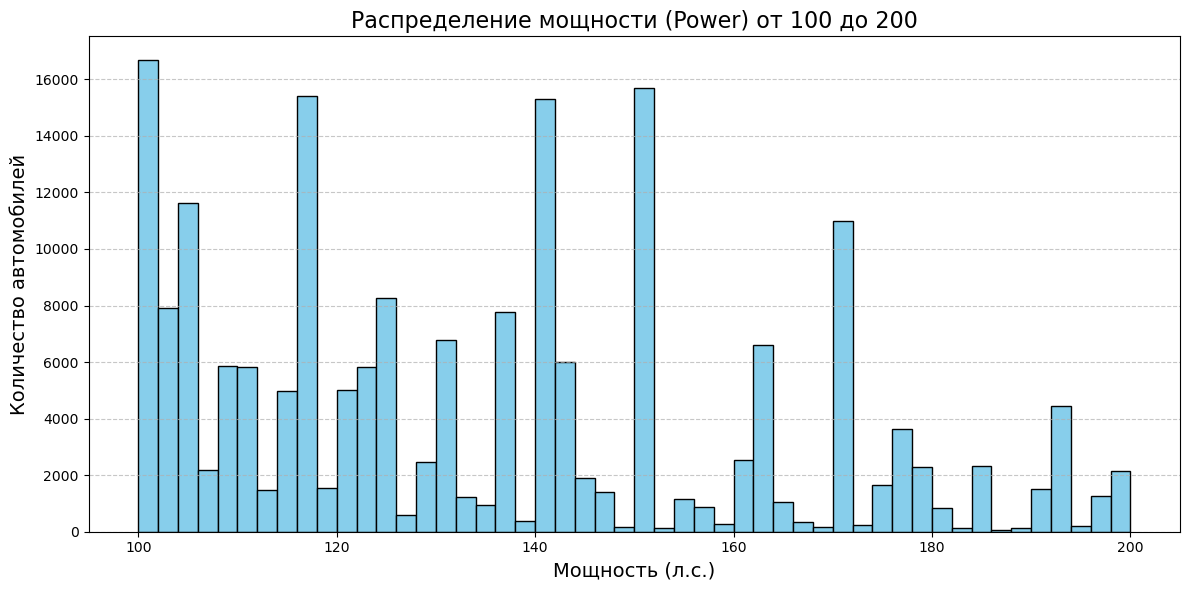

In [178]:
# Можно ограничить отображение, чтобы не мешали выбросы
data[data['Power'] <= 100]['Power'].plot(kind='hist', bins=100, color='skyblue', edgecolor='black')
plt.title('Распределение мощности (Power) до 100 л.с', fontsize=16)
plt.xlabel('Мощность (л.с.)', fontsize=14)
plt.ylabel('Количество автомобилей', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Фильтрация: от 100 до 200 л.с.
filtered = data[(data['Power'] >= 100) & (data['Power'] <= 200)]

# Построение гистограммы
plt.figure(figsize=(12, 6))
filtered['Power'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение мощности (Power) от 100 до 200', fontsize=16)
plt.xlabel('Мощность (л.с.)', fontsize=14)
plt.ylabel('Количество автомобилей', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [179]:
data.query('Model == "fortwo" and Power == 286')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
295582,2016-03-20 20:51:39,11000,sedan,1998,manual,286.0,fortwo,150000,7,petrol,smart,no,2016-03-20,85778,2016-03-24 14:18:00


smart fortwo как будто столько не стоит. да и 286 сил многовато! Чипанул так чипанул)) что же делать с таким выбросом?

In [180]:
data.query('Power < 50 and Power != 0')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
70,2016-03-08 01:36:42,800,small,1993,manual,45.0,polo,150000,3,petrol,volkswagen,no,2016-03-08,8258,2016-04-05 23:46:00
193,2016-03-27 12:47:45,1200,coupe,1990,manual,45.0,golf,150000,0,petrol,volkswagen,unknown,2016-03-27,83317,2016-04-07 08:17:08
208,2016-03-13 00:56:50,2250,small,2001,auto,41.0,fortwo,150000,10,gasoline,smart,no,2016-03-13,78224,2016-03-30 01:47:18
212,2016-03-11 19:50:22,1200,small,2002,manual,45.0,lupo,150000,9,petrol,volkswagen,no,2016-03-11,38707,2016-03-20 07:18:49
232,2016-03-12 08:51:00,1000,suv,1982,manual,41.0,other,150000,11,petrol,suzuki,unknown,2016-03-12,56337,2016-03-13 00:45:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354175,2016-03-20 17:55:27,0,small,1995,manual,45.0,polo,150000,0,petrol,volkswagen,unknown,2016-03-20,2625,2016-04-07 00:46:35
354223,2016-03-26 08:37:13,200,small,1991,manual,45.0,polo,150000,1,petrol,volkswagen,yes,2016-03-26,27798,2016-03-29 12:16:52
354266,2016-03-31 16:37:05,399,small,1992,manual,45.0,polo,150000,4,petrol,volkswagen,unknown,2016-03-31,74592,2016-03-31 16:37:05
354277,2016-03-10 22:55:50,0,small,1999,manual,37.0,arosa,150000,7,petrol,seat,yes,2016-03-10,22559,2016-03-12 23:46:32


In [181]:
data.query('Model == "fortwo" and RegistrationYear <= 2000').describe()

,DateCrawled,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,DateCreated,PostalCode,LastSeen
count,793,793.000000,793.000000,793.000000,793.000000,793.000000,793,793.000000,793
mean,2016-03-22 00:08:00.513240832,1361.452711,1999.464061,52.341740,121399.747793,6.087011,2016-03-21 07:12:10.895334144,47586.514502,2016-03-29 01:59:46.127364352
min,2016-03-05 14:29:00,0.000000,1992.000000,33.000000,5000.000000,0.000000,2016-02-16 00:00:00,1445.000000,2016-03-05 19:44:51
25%,2016-03-13 17:25:24,900.000000,1999.000000,45.000000,100000.000000,2.000000,2016-03-13 00:00:00,26135.000000,2016-03-21 15:57:02
50%,2016-03-22 09:52:01,1350.000000,2000.000000,54.000000,125000.000000,7.000000,2016-03-22 00:00:00,47229.000000,2016-04-01 21:45:26
75%,2016-03-29 18:38:16,1790.000000,2000.000000,54.000000,150000.000000,10.000000,2016-03-29 00:00:00,66571.000000,2016-04-06 08:44:27
max,2016-04-07 13:36:22,11000.000000,2000.000000,286.000000,150000.000000,12.000000,2016-04-07 00:00:00,99974.000000,2016-04-07 14:57:39
std,NaN,741.945574,0.744700,11.206644,37342.197946,4.067765,NaN,24929.233370,NaN


In [182]:
data.query('Model == "fortwo"').describe()

,DateCrawled,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,DateCreated,PostalCode,LastSeen
count,4605,4605.000000,4605.000000,4605.000000,4605.000000,4605.000000,4605,4605.000000,4605
mean,2016-03-21 18:29:16.284907776,3501.158089,2005.961998,65.856786,97776.330076,6.083388,2016-03-21 00:37:31.465797888,49311.675570,2016-03-30 13:38:09.615418112
min,2016-03-05 14:08:23,0.000000,1992.000000,31.000000,5000.000000,0.000000,2015-12-30 00:00:00,1108.000000,2016-03-05 17:17:02
25%,2016-03-14 09:56:32,1650.000000,2001.000000,54.000000,60000.000000,3.000000,2016-03-14 00:00:00,26553.000000,2016-03-24 03:44:52
50%,2016-03-21 20:39:18,2800.000000,2006.000000,61.000000,100000.000000,6.000000,2016-03-21 00:00:00,49479.000000,2016-04-04 15:56:18
75%,2016-03-29 12:50:17,4900.000000,2010.000000,71.000000,150000.000000,9.000000,2016-03-29 00:00:00,70178.000000,2016-04-06 11:36:18
max,2016-04-07 13:36:22,19690.000000,2018.000000,10218.000000,150000.000000,12.000000,2016-04-07 00:00:00,99974.000000,2016-04-07 14:58:49
std,NaN,2501.898525,5.170094,228.985666,42673.547181,3.649083,NaN,25031.271136,NaN


In [183]:
# Замена выбросов в Power на медиану модели внутри [q1, q3]

def replace_power_outliers_with_median(df):
    df = df.copy()

    for model, group in df.groupby('Model'):
        q1 = group['Power'].quantile(0.25)
        q3 = group['Power'].quantile(0.75)
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr

        median = group['Power'].median()

        # Маска выбросов
        outliers_mask = (df['Model'] == model) & ((df['Power'] < lower) | (df['Power'] > upper))

        # Замена
        df.loc[outliers_mask, 'Power'] = median

    return df

# Применяем
data = replace_power_outliers_with_median(data)


In [184]:
data.query('Model == "fortwo"').describe()

,DateCrawled,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,DateCreated,PostalCode,LastSeen
count,4605,4605.000000,4605.000000,4605.000000,4605.000000,4605.000000,4605,4605.000000,4605
mean,2016-03-21 18:29:16.284907776,3501.158089,2005.961998,59.307600,97776.330076,6.083388,2016-03-21 00:37:31.465797888,49311.675570,2016-03-30 13:38:09.615418112
min,2016-03-05 14:08:23,0.000000,1992.000000,31.000000,5000.000000,0.000000,2015-12-30 00:00:00,1108.000000,2016-03-05 17:17:02
25%,2016-03-14 09:56:32,1650.000000,2001.000000,54.000000,60000.000000,3.000000,2016-03-14 00:00:00,26553.000000,2016-03-24 03:44:52
50%,2016-03-21 20:39:18,2800.000000,2006.000000,61.000000,100000.000000,6.000000,2016-03-21 00:00:00,49479.000000,2016-04-04 15:56:18
75%,2016-03-29 12:50:17,4900.000000,2010.000000,71.000000,150000.000000,9.000000,2016-03-29 00:00:00,70178.000000,2016-04-06 11:36:18
max,2016-04-07 13:36:22,19690.000000,2018.000000,90.000000,150000.000000,12.000000,2016-04-07 00:00:00,99974.000000,2016-04-07 14:58:49
std,NaN,2501.898525,5.170094,11.451206,42673.547181,3.649083,NaN,25031.271136,NaN


In [185]:
missing_power = data['Power'].isna().sum()
print(f'Пропусков в Power: {missing_power}')


Пропусков в Power: 2


In [186]:
data = data.dropna(subset=['Power'])


Выбросы уничтожены быстро и мощно в столбце Power. На подходе еще 200 000 столбцов!!

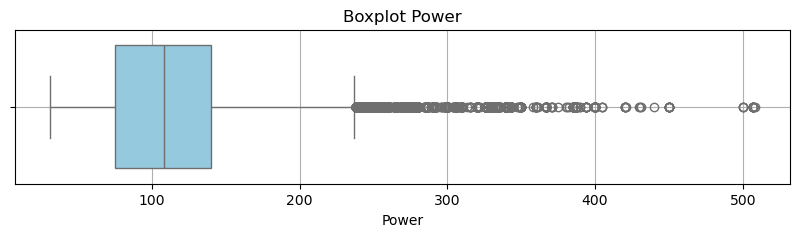

In [187]:
# Box plot для Power
plt.figure(figsize=(10, 2))
sns.boxplot(x=data['Power'], color='skyblue')
plt.title('Boxplot Power')
plt.xlabel('Power')
plt.grid(True)
plt.show()


Это другое!

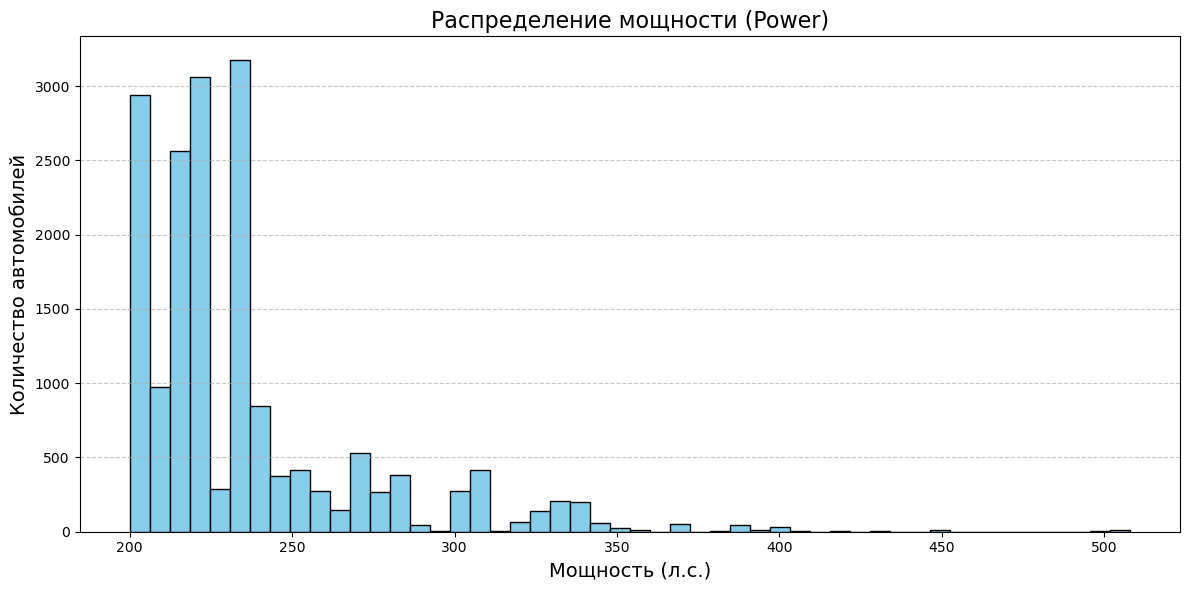

In [188]:
# Фильтрация
filtered = data[(data['Power'] >= 200) & (data['Power'] <= 33330)]

# Построение гистограммы
plt.figure(figsize=(12, 6))
filtered['Power'].plot(kind='hist', bins=50, color='skyblue', edgecolor='black')
plt.title('Распределение мощности (Power)', fontsize=16)
plt.xlabel('Мощность (л.с.)', fontsize=14)
plt.ylabel('Количество автомобилей', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

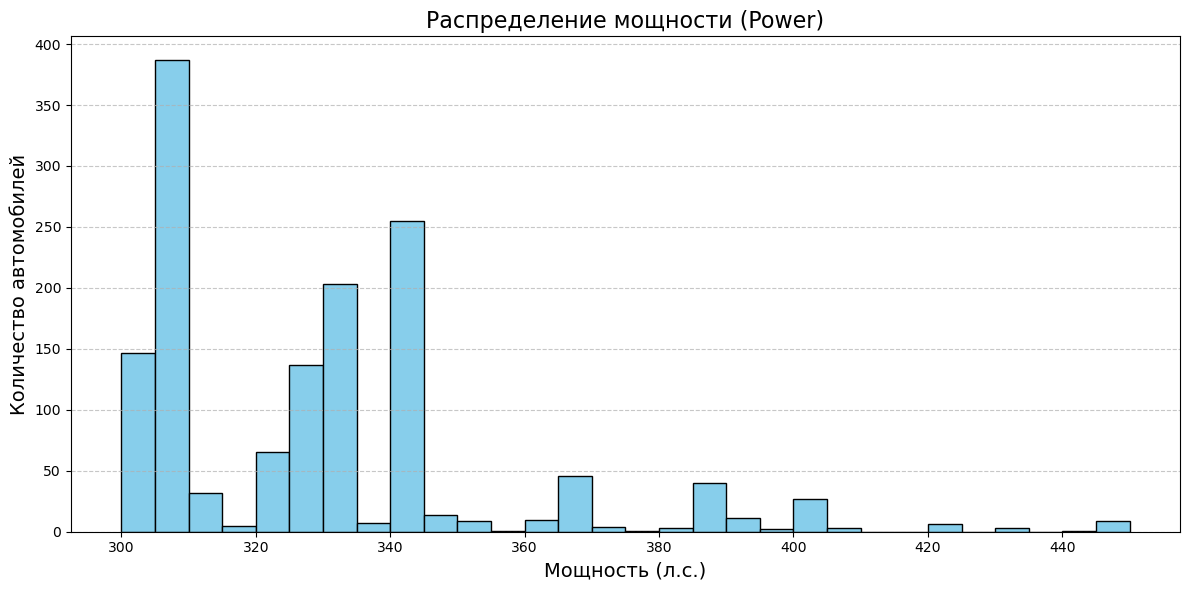

In [189]:
# Фильтрация
filtered = data[(data['Power'] >= 300) & (data['Power'] <= 459)]

# Построение гистограммы
plt.figure(figsize=(12, 6))

filtered['Power'].plot(kind='hist', bins=30, color='skyblue', edgecolor='black')
plt.title('Распределение мощности (Power)', fontsize=16)
plt.xlabel('Мощность (л.с.)', fontsize=14)
plt.ylabel('Количество автомобилей', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Очень хочется просто избавиться от машинок выше 350 л.с

In [190]:
data[(data['Power'] >= 350)]

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
2332,2016-03-07 00:52:29,0,sedan,1997,auto,375.0,7er,150000,0,petrol,bmw,unknown,2016-03-06,44329,2016-03-15 03:15:22
2901,2016-03-30 11:41:34,12900,sedan,2006,auto,387.0,s_klasse,150000,7,petrol,mercedes_benz,no,2016-03-30,47443,2016-04-01 05:15:43
3245,2016-04-02 21:57:12,15500,sedan,2006,auto,387.0,s_klasse,150000,2,petrol,mercedes_benz,no,2016-04-02,59065,2016-04-06 23:45:57
4043,2016-03-07 02:37:10,14990,suv,2005,auto,350.0,cayenne,150000,12,lpg,porsche,no,2016-03-07,48691,2016-04-05 15:17:00
5400,2016-03-07 15:56:11,12900,sedan,2005,auto,367.0,7er,150000,9,petrol,bmw,no,2016-03-07,73066,2016-04-05 12:15:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347540,2016-03-23 04:37:06,14900,sedan,2006,auto,367.0,7er,150000,1,petrol,bmw,no,2016-03-23,10709,2016-04-07 07:17:18
348893,2016-03-23 12:55:34,4500,sedan,2001,auto,360.0,s_klasse,150000,8,gasoline,mercedes_benz,yes,2016-03-23,13587,2016-03-29 06:18:03
349985,2016-04-04 00:55:36,14950,coupe,2007,auto,367.0,6er,150000,6,petrol,bmw,no,2016-04-04,22159,2016-04-06 09:16:39
350420,2016-03-25 16:57:36,19500,convertible,1997,auto,394.0,sl,150000,1,petrol,mercedes_benz,no,2016-03-25,25813,2016-04-06 22:45:01


Ну ладно, это премиум бибики, МО должно понять взаимосвязь. Ща только с ценой разберусь.

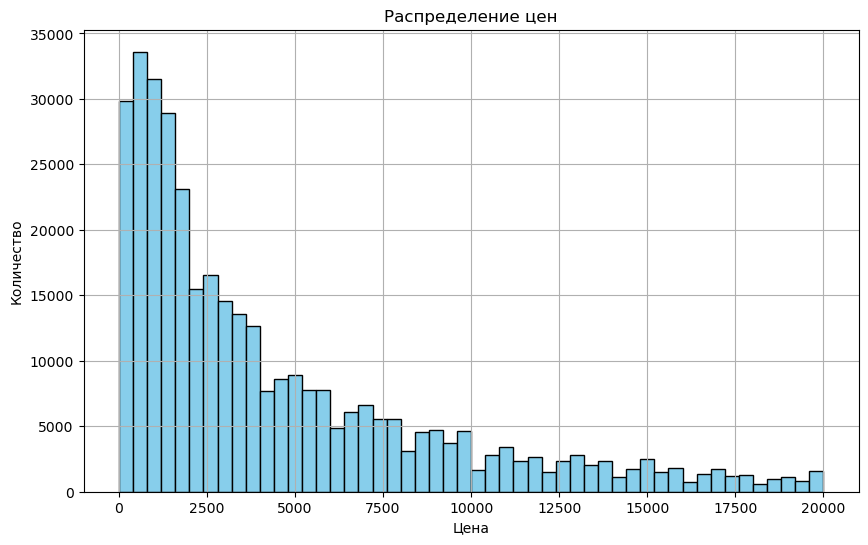

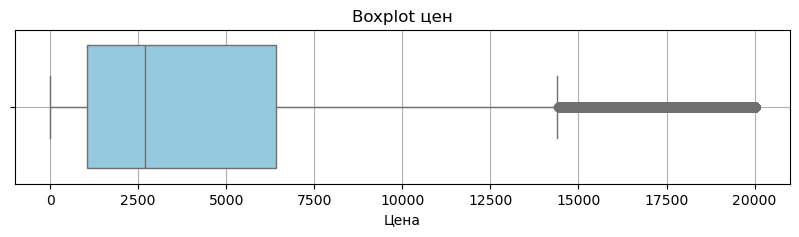

In [191]:
# Гистограмма для Price

data['Price'].plot(kind='hist', bins=50, figsize=(10,6), color='skyblue', edgecolor='black')
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

# Box plot для Price


plt.figure(figsize=(10, 2))
sns.boxplot(x=data['Price'], color='skyblue')
plt.title('Boxplot цен')
plt.xlabel('Цена')
plt.grid(True)
plt.show()


In [192]:
q1 = data['Price'].quantile(0.25)
q2 = data['Price'].median()
q3 = data['Price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Q1: {q1}, Q2 (median): {q2}, Q3: {q3}")
print(f"IQR: {iqr}")
print(f"Whisker bounds: {lower_bound} ... {upper_bound}")


Q1: 1050.0, Q2 (median): 2700.0, Q3: 6400.0
IQR: 5350.0
Whisker bounds: -6975.0 ... 14425.0


In [193]:
per1 = len(data[data['Price'] < upper_bound])
per2 = len(data[data['Price'] > upper_bound])
per3 = per2/per1
print('Количество ниже границы:', per1)
print('Количество выше границы:', per2)
print(f'Отношение {per3:.2f}')

Количество ниже границы: 334897
Количество выше границы: 18918
Отношение 0.06


In [194]:
# Заменим все Price == 0 на медиану по модели, а то функция ниже не работает на такие случаи

In [195]:
# 1. Медианы по Model и Brand:
price_median_by_model = data[data['Price'] > 0].groupby('Model')['Price'].median()
# Если модель other, то по Brand:
price_median_by_brand = data[data['Price'] > 0].groupby('Brand')['Price'].median()
overall_median = data[data['Price'] > 0]['Price'].median()

# 2. Маска строк с нулевой ценой
zero_price_mask = data['Price'] == 0

# 3. Функция для замены
def fill_zero_price(row):
    if row['Price'] > 0:
        return row['Price']
    
    model = row['Model']
    brand = row['Brand']
    
    if pd.notna(model) and model != 'other' and model in price_median_by_model:
        return round(price_median_by_model[model])
    elif pd.notna(brand) and brand in price_median_by_brand:
        return round(price_median_by_brand[brand])
    else:
        return round(overall_median)

# 4. Применяем
data.loc[zero_price_mask, 'Price'] = data.loc[zero_price_mask].apply(fill_zero_price, axis=1).astype(int)


In [196]:
def replace_price_outliers_with_median(df, min_price=100):
    df = df.copy()

    for model, group in df.groupby('Model'):
        q1 = group['Price'].quantile(0.25)
        q3 = group['Price'].quantile(0.75)
        iqr = q3 - q1

        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        median = round(group['Price'].median())

        # выбросы по IQR и по нижнему порогу
        outliers_mask = (group['Price'] < lower) | (group['Price'] > upper) | (group['Price'] < min_price)

        # заменяем по ИНДЕКСАМ внутри исходного df
        outliers_idx = group[outliers_mask].index
        df.loc[outliers_idx, 'Price'] = median

    return df


In [197]:
print(data.query('Model == "3er" and Price < 100')[['Price']].head())

data = replace_price_outliers_with_median(data, min_price=300)

print(data.query('Model == "3er" and Price < 100')[['Price']].head())


       Price
2179       1
3462       1
4481       1
14418     47
15561     85
Empty DataFrame
Columns: [Price]
Index: []


In [198]:
group = data[data['Model'] == '3er']
q1 = group['Price'].quantile(0.25)
q3 = group['Price'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

print(f"Q1: {q1}, Q3: {q3}, IQR: {iqr}, Lower: {lower}, Upper: {upper}")


Q1: 1890.0, Q3: 5999.0, IQR: 4109.0, Lower: -4273.5, Upper: 12162.5


Можно попробовать прологарифмировать таргет, так как на линейные модели выбросы влияют, а на градиентный бустинг вроде бы и нет. Будет несколько таргетов

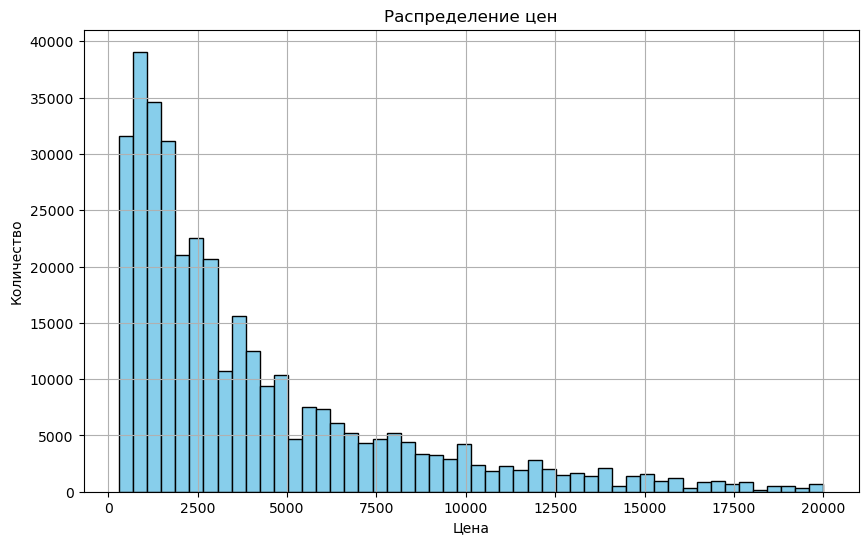

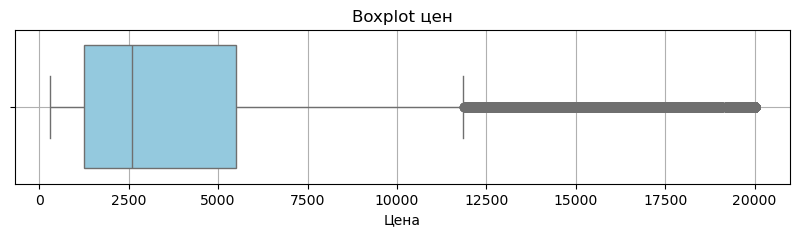

In [199]:
# Гистограмма для Price

data['Price'].plot(kind='hist', bins=50, figsize=(10,6), color='skyblue', edgecolor='black')
plt.title('Распределение цен')
plt.xlabel('Цена')
plt.ylabel('Количество')
plt.grid(True)
plt.show()

# Box plot для Price


plt.figure(figsize=(10, 2))
sns.boxplot(x=data['Price'], color='skyblue')
plt.title('Boxplot цен')
plt.xlabel('Цена')
plt.grid(True)
plt.show()


In [200]:
per1 = len(data[data['Price'] < upper_bound])
per2 = len(data[data['Price'] > upper_bound])
per3 = per2/per1
print('Количество ниже границы:', per1)
print('Количество выше границы:', per2)
print(f'Отношение {per3:.2f}')

Количество ниже границы: 342725
Количество выше границы: 11090
Отношение 0.03


In [201]:
data.query('Price < 500')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,sedan,1993,manual,75.0,golf,150000,0,petrol,volkswagen,unknown,2016-03-24,70435,2016-04-07 03:16:57
16,2016-04-01 12:46:46,300,small,2016,manual,60.0,polo,150000,0,petrol,volkswagen,unknown,2016-04-01,38871,2016-04-01 12:46:46
23,2016-03-12 19:43:07,450,small,1997,manual,50.0,arosa,150000,5,petrol,seat,no,2016-03-12,9526,2016-03-21 01:46:11
35,2016-03-08 07:54:46,350,sedan,2016,manual,75.0,golf,150000,4,petrol,volkswagen,no,2016-03-08,19386,2016-03-08 09:44:50
81,2016-04-03 12:56:45,350,small,1997,manual,54.0,punto,150000,3,petrol,fiat,yes,2016-04-03,45665,2016-04-05 11:47:13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354296,2016-03-30 19:49:48,450,small,1997,manual,102.0,3er,150000,6,petrol,bmw,no,2016-03-30,66892,2016-04-01 14:46:24
354297,2016-03-11 12:52:58,400,wagon,1996,manual,150.0,a4,150000,0,petrol,audi,unknown,2016-03-11,85110,2016-03-11 13:43:10
354318,2016-03-15 19:57:11,400,wagon,1991,manual,109.5,legacy,150000,0,petrol,subaru,unknown,2016-03-15,24558,2016-03-19 15:49:00
354329,2016-03-30 20:55:30,350,small,1996,manual,65.0,punto,150000,0,petrol,fiat,unknown,2016-03-30,25436,2016-04-07 13:50:41


In [202]:
print(data.query('Price < 500')[['Model', 'Price']].count())


Model    12849
Price    12849
dtype: int64


Решил выкинуть 3.6% данных — пусть модель не захлёбывается в шуме:

Будет надежная модель.
Любые аномально низкие, шумные или искусственные значения будут: тянуть модель вниз, искажать распределение, портить rmse, снижать обобщающую способность.

In [203]:
data = data[data['Price'] >= 500]


In [204]:
#Летс гооу

Мб буду использовать:

In [205]:
data['Price_log'] = np.log1p(data['Price'])

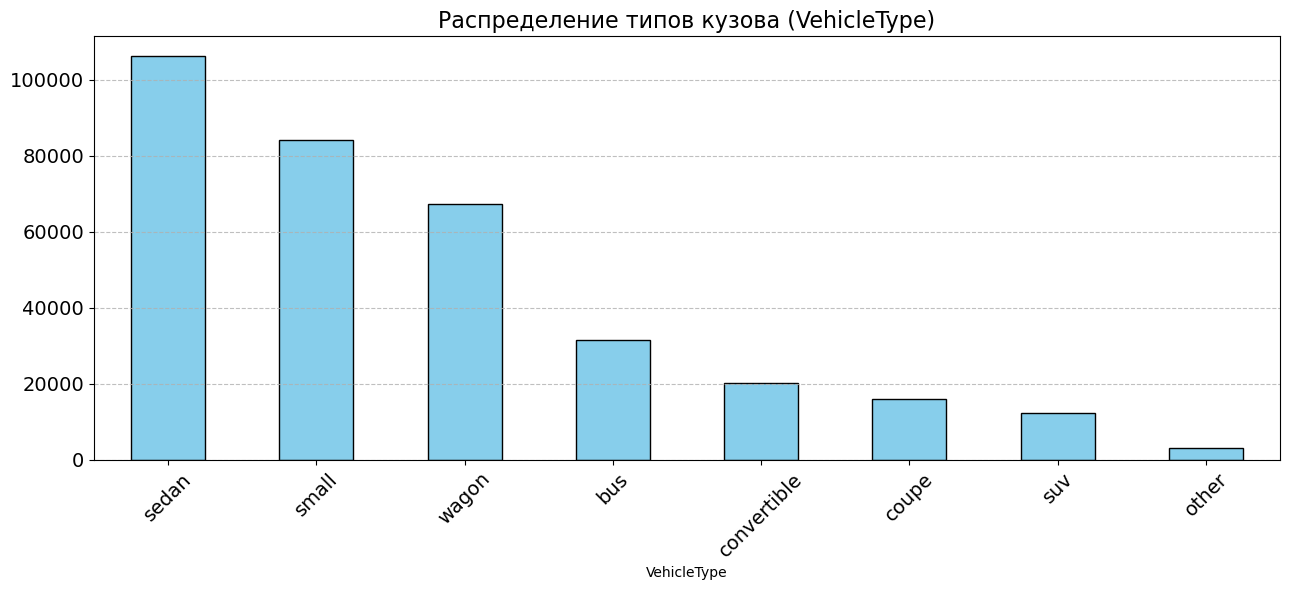

In [206]:
# Получаем частоты
vehicle_counts = data['VehicleType'].value_counts()

# Строим диаграмму
vehicle_counts.plot(kind='bar', figsize=(13, 6), color='skyblue', edgecolor='black')

# Оформление

plt.title('Распределение типов кузова (VehicleType)', fontsize=16)
#plt.xlabel('Тип кузова', fontsize=14)
#plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show()


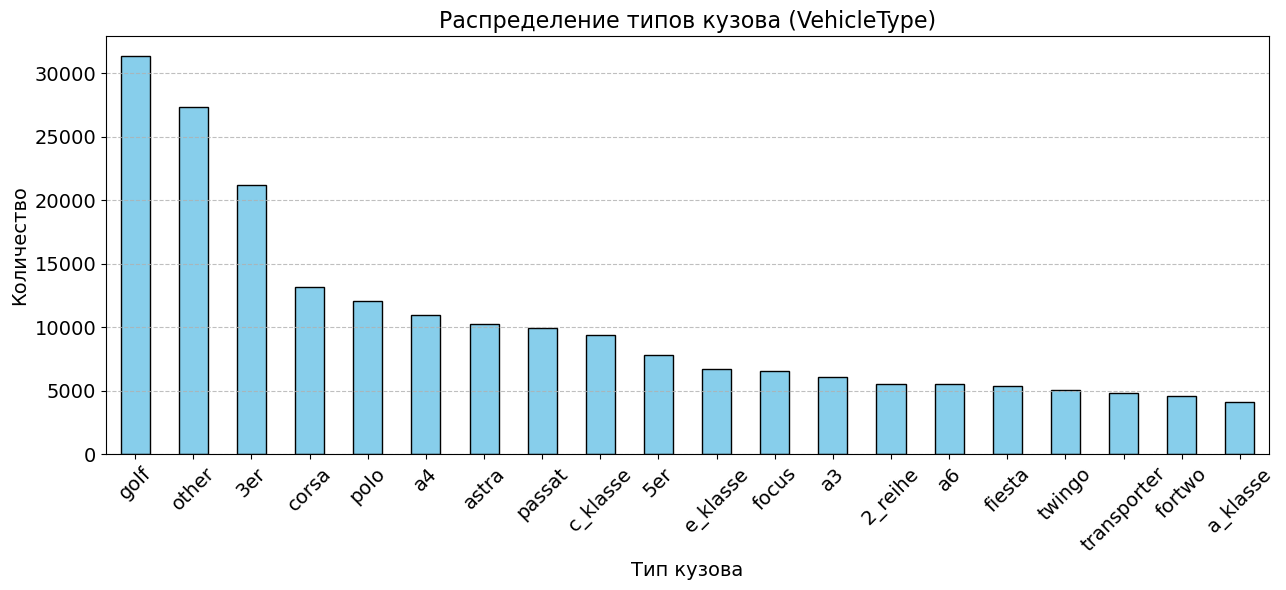

In [207]:
# Получаем частоты
vehicle_counts = data['Model'].value_counts().head(20)

# Строим диаграмму
vehicle_counts.plot(kind='bar', figsize=(13, 6), color='skyblue', edgecolor='black')

# Оформление

plt.title('Распределение типов кузова (VehicleType)', fontsize=16)
plt.xlabel('Тип кузова', fontsize=14)
plt.ylabel('Количество', fontsize=14)
plt.xticks(rotation=45, fontsize=14)
plt.yticks(fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.tight_layout()
plt.show()


In [208]:
data.query('RegistrationYear > 2016')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen,Price_log
22,2016-03-23 14:52:51,2900,bus,2018,manual,101.0,meriva,150000,5,petrol,opel,no,2016-03-23,49716,2016-03-31 01:16:33,7.972811
26,2016-03-10 19:38:18,5555,sedan,2017,manual,125.0,c4,125000,4,gasoline,citroen,no,2016-03-10,31139,2016-03-16 09:16:46,8.622634
48,2016-03-25 14:40:12,7750,sedan,2017,manual,80.0,golf,100000,1,petrol,volkswagen,unknown,2016-03-25,48499,2016-03-31 21:47:44,8.955577
51,2016-03-07 18:57:08,2000,small,2017,manual,90.0,punto,150000,11,gasoline,fiat,yes,2016-03-07,66115,2016-03-07 18:57:08,7.601402
57,2016-03-10 20:53:19,2399,sedan,2018,manual,64.0,other,125000,3,petrol,seat,no,2016-03-10,33397,2016-03-25 10:17:37,7.783224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354112,2016-03-11 15:49:51,3600,bus,2017,manual,86.0,transit,150000,5,gasoline,ford,unknown,2016-03-11,32339,2016-03-12 05:45:02,8.188967
354140,2016-03-29 16:47:29,1000,wagon,2017,manual,101.0,a4,150000,9,gasoline,audi,unknown,2016-03-29,38315,2016-04-06 02:44:27,6.908755
354203,2016-03-17 00:56:26,2140,small,2018,manual,80.0,fiesta,150000,6,petrol,ford,no,2016-03-17,44866,2016-03-29 15:45:04,7.669028
354253,2016-03-25 09:37:59,1250,small,2018,manual,66.5,corsa,150000,0,petrol,opel,unknown,2016-03-25,45527,2016-04-06 07:46:13,7.131699


In [209]:
data.query('RegistrationYear < 1930')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen,Price_log


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 340966 entries, 1 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        340966 non-null  datetime64[ns]
 1   Price              340966 non-null  int64         
 2   VehicleType        340966 non-null  object        
 3   RegistrationYear   340966 non-null  int64         
 4   Gearbox            340966 non-null  object        
 5   Power              340966 non-null  float64       
 6   Model              340966 non-null  object        
 7   Kilometer          340966 non-null  int64         
 8   RegistrationMonth  340966 non-null  int64         
 9   FuelType           340966 non-null  object        
 10  Brand              340966 non-null  object        
 11  Repaired           340966 non-null  object        
 12  DateCreated        340966 non-null  datetime64[ns]
 13  PostalCode         340966 non-null  int64        

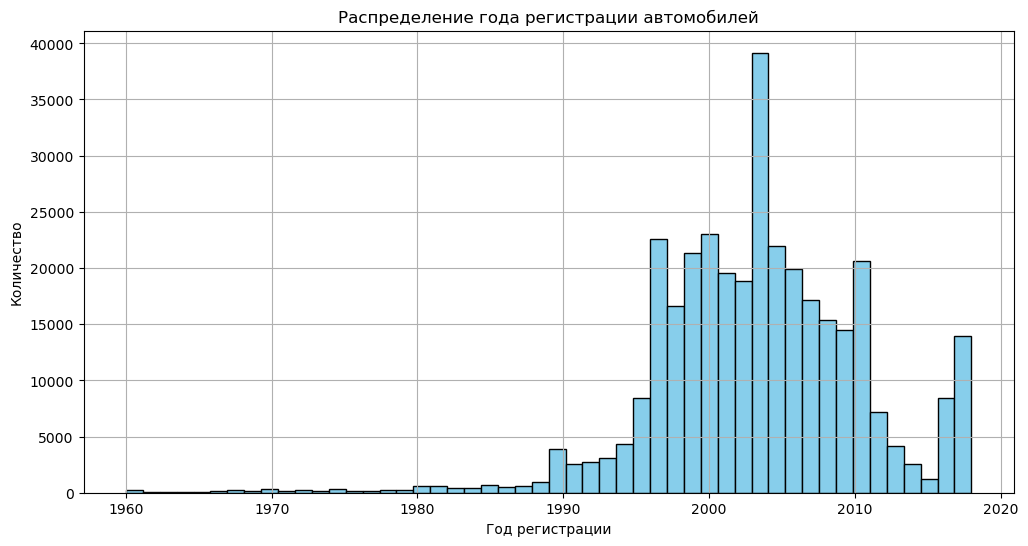

In [211]:
data['RegistrationYear'].plot(kind='hist', bins=50, figsize=(12,6), color='skyblue', edgecolor='black')
plt.title('Распределение года регистрации автомобилей')
plt.xlabel('Год регистрации')
plt.ylabel('Количество')
plt.grid(True)
plt.show()


In [212]:
data.query('RegistrationYear< 1983')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,PostalCode,LastSeen,Price_log
7,2016-03-21 18:54:38,2800,sedan,1980,manual,50.0,other,40000,7,petrol,volkswagen,no,2016-03-21,19348,2016-03-25 16:47:58,7.937732
28,2016-03-09 11:56:38,1990,bus,1981,manual,50.0,transporter,5000,1,petrol,volkswagen,no,2016-03-09,87471,2016-03-10 07:44:33,7.596392
232,2016-03-12 08:51:00,1000,suv,1982,manual,41.0,other,150000,11,petrol,suzuki,unknown,2016-03-12,56337,2016-03-13 00:45:46,6.908755
360,2016-03-17 14:52:07,10000,bus,1976,manual,50.0,transporter,5000,0,petrol,volkswagen,unknown,2016-03-17,73479,2016-03-19 14:21:08,9.210440
532,2016-03-07 18:39:04,6500,convertible,1981,auto,204.0,sl,150000,3,petrol,mercedes_benz,yes,2016-03-07,13125,2016-03-09 07:46:08,8.779711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353993,2016-03-31 00:50:02,7000,coupe,1980,auto,114.0,other,80000,8,petrol,ford,no,2016-03-30,52076,2016-04-06 00:17:27,8.853808
354037,2016-03-23 16:57:30,10500,convertible,1968,manual,54.0,other,20000,4,petrol,renault,no,2016-03-23,63755,2016-03-25 00:47:18,9.259226
354063,2016-03-08 23:37:04,14000,convertible,1970,auto,170.0,sl,150000,0,petrol,mercedes_benz,unknown,2016-03-08,34123,2016-04-07 05:15:38,9.546884
354165,2016-03-15 12:55:31,8500,coupe,1981,auto,136.0,other,150000,4,petrol,mercedes_benz,no,2016-03-15,25335,2016-03-26 13:18:31,9.047939


Короче, удаляем винтажные машины: на свалку!!!

Цель — построить ML-модель оценки стоимости на нормальные автомобили (обычные покупки-продажи), поэтому трициклы Бенца удаляем. 

In [213]:
data = data[data['RegistrationYear'] >= 1983]


In [214]:
data.shape[0]

336829

5% удалил. Приемлемо

In [215]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 336829 entries, 1 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        336829 non-null  datetime64[ns]
 1   Price              336829 non-null  int64         
 2   VehicleType        336829 non-null  object        
 3   RegistrationYear   336829 non-null  int64         
 4   Gearbox            336829 non-null  object        
 5   Power              336829 non-null  float64       
 6   Model              336829 non-null  object        
 7   Kilometer          336829 non-null  int64         
 8   RegistrationMonth  336829 non-null  int64         
 9   FuelType           336829 non-null  object        
 10  Brand              336829 non-null  object        
 11  Repaired           336829 non-null  object        
 12  DateCreated        336829 non-null  datetime64[ns]
 13  PostalCode         336829 non-null  int64        

In [216]:
data.RegistrationMonth.unique()

array([ 5,  8,  6,  7, 10,  0, 12, 11,  2,  3,  1,  4,  9])

Это что такое?? Это почему это с 0 до 12. 

In [217]:
data.RegistrationMonth.value_counts()

RegistrationMonth
3     32861
0     32669
6     30207
4     27967
5     27951
7     25892
10    25260
12    23462
11    23408
9     23022
1     22037
8     21832
2     20261
Name: count, dtype: int64

0 – это либо: 
* пропущенные значения, которые закодированы как 0
* специально введённые «нулевые» значения (например, когда месяц неизвестен).

                                           Ну просто не будем использовать этот столбец при обучении лин. рег

In [218]:
data.FuelType.unique()

array(['gasoline', 'petrol', 'lpg', 'other', 'hybrid', 'cng', 'electric'],
      dtype=object)

gasoline для сша, а petrol обычно у всех остальных. В целом тот же самый бензин, но цены в Америке могут быть выше.

Предобработка данных на этом этапе окончена. Можно но не хочется делать графики.

## Создание фичей / Кодирование данных

Здесь я смотрю столбцы и выбираю что и как кодировать

In [219]:
data["RegistrationYear"].max()


2018

In [220]:
len(data.query('RegistrationYear == 2018'))

3940

In [221]:
len(data.query('RegistrationYear == 2017'))

10018

In [222]:
data.query('RegistrationYear == 2018')['Price'].mean()

3296.2289340101524

In [223]:
data.query('RegistrationYear == 2018')['Price'].median()

2222.0

In [224]:
data.query('RegistrationYear == 2017')['Price'].median()

1999.5

Машины из будущего

In [225]:
# дата создания анкеты
data.DateCreated.dt.year.unique()

array([2016, 2015, 2014], dtype=int32)

In [226]:
data.DateCrawled.dt.year.unique()

array([2016], dtype=int32)

In [227]:
data["CarAge"] = CURRENT_YEAR - data["RegistrationYear"] # CURRENT_YEAR = 2018


In [228]:
data["RegistrationMonth"].value_counts()

RegistrationMonth
3     32861
0     32669
6     30207
4     27967
5     27951
7     25892
10    25260
12    23462
11    23408
9     23022
1     22037
8     21832
2     20261
Name: count, dtype: int64

In [229]:
data["RegistrationMonth"].unique()

array([ 5,  8,  6,  7, 10,  0, 12, 11,  2,  3,  1,  4,  9])

In [230]:
# Переведем месяцы в сезоны. Может, модель лучше справится?
def get_season(month):
    if month in [12, 1, 2]:
        return "winter"
    elif month in [3, 4, 5]:
        return "spring"
    elif month in [6, 7, 8]:
        return "summer"
    elif month in [9, 10, 11]:
        return "autumn"
    else:
        return "unknown"

data["RegSeason"] = data["RegistrationMonth"].apply(get_season)

In [231]:
data.Model.unique()

array(['a4', 'grand', 'golf', 'fabia', '3er', '2_reihe', 'c_max',
       '3_reihe', 'passat', 'navara', 'twingo', 'a_klasse', 'scirocco',
       '5er', 'meriva', 'other', 'c4', 'civic', 'punto', 'e_klasse',
       'clio', 'kadett', 'kangoo', 'corsa', 'one', 'fortwo', '1er',
       'b_klasse', 'signum', 'astra', 'a8', 'jetta', 'polo', 'fiesta',
       'c_klasse', 'micra', 'vito', 'sprinter', '156', 'escort',
       'forester', 'xc_reihe', 'scenic', 'ka', 'a1', 'insignia',
       'transporter', 'combo', 'focus', 'tt', 'a6', 'jazz', 'slk', '7er',
       '80', '147', '100', 'z_reihe', 'sportage', 'sorento', 'ibiza',
       'mustang', 'eos', 'touran', 'getz', 'a3', 'almera', 'megane',
       'lupo', 'zafira', 'caddy', 'mondeo', 'cordoba', 'colt', 'impreza',
       'vectra', 'berlingo', 'tiguan', 'i_reihe', 'espace', 'sharan',
       '6_reihe', 'panda', 'up', 'seicento', 'ceed', '5_reihe', 'yeti',
       'octavia', 'mii', 'rx_reihe', '6er', 'modus', 'fox', 'matiz',
       'beetle', 'c1', 'ri

In [ ]:
Это все кодировать безумие, поэтому разделим модели на частоту

In [232]:
model_counts = data["Model"].value_counts()
data["ModelFreq"] = data["Model"].map(model_counts)


In [233]:
data.Brand.unique()

array(['audi', 'jeep', 'volkswagen', 'skoda', 'bmw', 'peugeot', 'ford',
       'mazda', 'nissan', 'renault', 'mercedes_benz', 'opel', 'citroen',
       'honda', 'fiat', 'mini', 'smart', 'hyundai', 'seat',
       'sonstige_autos', 'alfa_romeo', 'subaru', 'volvo', 'mitsubishi',
       'kia', 'lancia', 'toyota', 'chevrolet', 'dacia', 'suzuki',
       'daihatsu', 'trabant', 'saab', 'chrysler', 'jaguar', 'daewoo',
       'porsche', 'land_rover', 'lada'], dtype=object)

Разделим бренды по сегментам.

In [234]:
premium = {"bmw", "audi", "mercedes_benz", "porsche", "jaguar", "land_rover", "mini"}
mass = {"volkswagen", "ford", "opel", "skoda", "peugeot", "nissan", "mazda", "renault"}
budget = {"kia", "hyundai", "dacia", "fiat", "chevrolet", "suzuki", "chrysler", "daewoo", "lada"}

def classify_brand(brand):
    if brand in premium:
        return "premium"
    elif brand in mass:
        return "mass"
    elif brand in budget:
        return "budget"
    else:
        return "other"

data["BrandClass"] = data["Brand"].apply(classify_brand)


In [235]:
data.Power.unique()

array([190.  , 163.  ,  75.  ,  69.  , 102.  , 109.  , 125.  , 101.  ,
       105.  , 140.  , 115.  , 131.  , 136.  , 160.  , 231.  , 118.  ,
       193.  ,  99.  ,  60.  , 113.  , 218.  , 122.  , 129.  ,  70.  ,
       170.  ,  95.  ,  61.  , 177.  ,  80.  ,  90.  ,  55.  , 143.  ,
       155.  ,  64.  , 116.  , 232.  ,  45.  , 150.  ,  50.  , 156.  ,
        82.  , 185.  ,  87.  , 180.  ,  86.  ,  84.  , 224.  , 235.  ,
       178.  ,  98.  ,  77.  , 110.  , 120.  ,  54.  , 286.  , 184.  ,
       126.  , 204.  ,  88.  , 194.  ,  58.  , 305.  , 197.  , 179.  ,
       107.  ,  41.  , 165.  , 130.  , 114.  ,  56.  , 213.  ,  83.  ,
       100.  , 220.  , 265.  ,  85.  ,  73.  , 124.  , 192.  ,  68.  ,
        66.  , 299.  ,  74.  ,  52.  , 147.  ,  71.  ,  97.  ,  65.  ,
       239.  , 203.  , 128.  , 144.  , 103.  , 258.  , 320.  ,  63.  ,
        81.  , 148.  , 176.  , 129.5 , 145.  , 260.  , 104.  , 121.  ,
       306.  , 188.  , 186.  , 117.  , 141.  ,  59.  , 132.  , 279.  ,
      

In [236]:
data["Power"] = data["Power"].astype(int)  #  отбрасываем дробную часть

In [237]:
data.FuelType.unique()

array(['gasoline', 'petrol', 'lpg', 'other', 'hybrid', 'cng', 'electric'],
      dtype=object)

In [238]:
# data = pd.get_dummies(data, columns=["VehicleType"], drop_first=True)
# data = pd.get_dummies(data, columns=["Gearbox"], drop_first=True)
# data = pd.get_dummies(data, columns=["FuelType"], drop_first=True)
# data = pd.get_dummies(data, columns=["Repaired"], drop_first=True)
# data = pd.get_dummies(data, columns=["RegSeason"], drop_first=True)
# data = pd.get_dummies(data, columns=["BrandClass"], drop_first=True)


## Обучение моделей

In [239]:
data.VehicleType.unique()

array(['coupe', 'suv', 'small', 'sedan', 'convertible', 'bus', 'wagon',
       'other'], dtype=object)


%% time не забудь
Бахнем LinearRegression, Ridge, Lasso, ElasticNet

PolynomialFeatures + LinearRegression

HuberRegressor

RANSACRegressor

RandomForest

LightGBM

GradientBoosting

CatBoost

Upd26_06: лень было делать вообще все, сделал Linear, Ridge, CatBoost
Может, потом сделаю. надо ли?

### LinearRegression

In [240]:
X = data.drop(columns=['Price','DateCrawled', 'RegistrationYear', 'Model', 'RegistrationMonth', 'Brand', 'DateCreated', 'PostalCode', 'LastSeen', 'Price_log'] )  # признаки
y = data["Price"] # целевая переменная

In [241]:
X = pd.get_dummies(X, columns=["VehicleType"], drop_first=True)
X = pd.get_dummies(X, columns=["Gearbox"], drop_first=True)
X = pd.get_dummies(X, columns=["FuelType"], drop_first=True)
X = pd.get_dummies(X, columns=["Repaired"], drop_first=True)
X = pd.get_dummies(X, columns=["RegSeason"], drop_first=True)
X = pd.get_dummies(X, columns=["BrandClass"], drop_first=True)

In [242]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336829 entries, 1 to 354368
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   Power                    336829 non-null  int64
 1   Kilometer                336829 non-null  int64
 2   CarAge                   336829 non-null  int64
 3   ModelFreq                336829 non-null  int64
 4   VehicleType_convertible  336829 non-null  bool 
 5   VehicleType_coupe        336829 non-null  bool 
 6   VehicleType_other        336829 non-null  bool 
 7   VehicleType_sedan        336829 non-null  bool 
 8   VehicleType_small        336829 non-null  bool 
 9   VehicleType_suv          336829 non-null  bool 
 10  VehicleType_wagon        336829 non-null  bool 
 11  Gearbox_manual           336829 non-null  bool 
 12  FuelType_electric        336829 non-null  bool 
 13  FuelType_gasoline        336829 non-null  bool 
 14  FuelType_hybrid          336829 non-null 

In [243]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [244]:
model = LinearRegression()
%%time
model.fit(X_train, y_train)

LinearRegression()

In [245]:
y_pred = model.predict(X_test)

In [275]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R^2: {r2}")

RMSE: 2823.851067960083
R^2: 0.4785744059332544


К сожалению, не проходит порог rmse в 2500

Посмотрим какие признаки влияют на модель

In [247]:
X.iloc[:, 4:].sum().sort_values()


FuelType_electric              88
FuelType_other                154
FuelType_hybrid               230
VehicleType_other            2927
FuelType_lpg                 5193
VehicleType_suv             12218
VehicleType_coupe           15335
VehicleType_convertible     19736
Repaired_yes                31942
RegSeason_unknown           32669
BrandClass_other            37776
Repaired_unknown            64087
RegSeason_winter            65760
VehicleType_wagon           67137
RegSeason_summer            77931
VehicleType_small           83801
RegSeason_spring            88779
BrandClass_premium         101321
FuelType_gasoline          102925
VehicleType_sedan          104364
BrandClass_mass            176245
FuelType_petrol            227690
Gearbox_manual             270518
dtype: int64

In [248]:
coefs = pd.Series(model.coef_, index=X_train.columns)
coefs_sorted = coefs.sort_values(key=abs, ascending=False)  # сортировка по модулю
print(coefs_sorted)

VehicleType_suv            2051.834140
BrandClass_premium         1527.304595
FuelType_electric         -1416.839359
Repaired_yes              -1337.956264
FuelType_hybrid            1301.673308
FuelType_lpg              -1090.926821
VehicleType_convertible    1086.754978
VehicleType_wagon          -927.493324
Repaired_unknown           -864.707660
VehicleType_sedan          -782.713961
FuelType_petrol            -751.145110
FuelType_other             -735.212998
RegSeason_unknown          -526.576786
FuelType_gasoline           479.719345
VehicleType_small          -476.954378
BrandClass_mass             366.849863
VehicleType_other          -309.547010
Gearbox_manual             -250.158083
BrandClass_other            237.223264
CarAge                     -151.890887
VehicleType_coupe           100.760597
RegSeason_spring            -79.931624
RegSeason_summer            -62.161364
RegSeason_winter            -53.714679
Power                        28.190538
Kilometer                

Имеются признаки с редкими значениями дают большие веса. Это опасно для линейной модели — т.к она пытается "запомнить" редкость, а не обучиться закономерности:

FuelType_electric: 88 примеров, но вес −1400 — вероятно переобучение

FuelType_hybrid: 230 строк — вес +1300

FuelType_lpg, FuelType_other: то же самое

Вывод: это сильный аргумент за то, чтобы объединить в FuelType_rare

In [249]:
rare_fuels = ["electric", "hybrid", "lpg", "other"]
data["FuelType"] = data["FuelType"].replace(rare_fuels, "rare")



In [250]:
from sklearn.preprocessing import StandardScaler




In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336829 entries, 1 to 354368
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        336829 non-null  datetime64[ns]
 1   Price              336829 non-null  int64         
 2   VehicleType        336829 non-null  object        
 3   RegistrationYear   336829 non-null  int64         
 4   Gearbox            336829 non-null  object        
 5   Power              336829 non-null  int64         
 6   Model              336829 non-null  object        
 7   Kilometer          336829 non-null  int64         
 8   RegistrationMonth  336829 non-null  int64         
 9   FuelType           336829 non-null  object        
 10  Brand              336829 non-null  object        
 11  Repaired           336829 non-null  object        
 12  DateCreated        336829 non-null  datetime64[ns]
 13  PostalCode         336829 non-null  int64        

In [253]:
data.FuelType.unique()

array(['gasoline', 'petrol', 'rare', 'cng'], dtype=object)

In [276]:
X2 = data.drop(columns=['Price','DateCrawled', 'RegistrationYear', 'Model', 'RegistrationMonth', 'Brand', 'DateCreated', 'PostalCode', 'LastSeen', 'Price_log'] )  # признаки
y2 = data["Price"] # целевая переменная

X2 = pd.get_dummies(X2, columns=["FuelType"], drop_first=True)
X2 = pd.get_dummies(X2, columns=["VehicleType"], drop_first=True)
X2 = pd.get_dummies(X2, columns=["Gearbox"], drop_first=True)
X2 = pd.get_dummies(X2, columns=["Repaired"], drop_first=True)
X2 = pd.get_dummies(X2, columns=["RegSeason"], drop_first=True)
X2 = pd.get_dummies(X2, columns=["BrandClass"], drop_first=True)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)


num_cols = ["Power", "Kilometer", "CarAge", "ModelFreq"]
scaler2 = StandardScaler()
X_train2[num_cols] = scaler2.fit_transform(X_train2[num_cols])
X_test2[num_cols] = scaler2.transform(X_test2[num_cols])

model2 = LinearRegression()



In [280]:
%%time
model2.fit(X_train2, y_train2)

CPU times: user 421 ms, sys: 55.8 ms, total: 477 ms
Wall time: 205 ms


LinearRegression()

In [278]:

y_pred2 = model2.predict(X_test2)

mse2= mean_squared_error(y_test2, y_pred2)
rmse2 = np.sqrt(mse2)
r2_2 = r2_score(y_test2, y_pred2)

print(f"RMSE: {rmse2}")
print(f"R^2: {r2_2}")

RMSE: 2824.9365455029
R^2: 0.4781734608817698


Не помогло

In [283]:
model3 = Ridge(alpha=1.0)


In [286]:
%%time
model3.fit(X_train2, y_train2)

CPU times: user 74.6 ms, sys: 48.8 ms, total: 123 ms
Wall time: 121 ms


Ridge()

In [287]:

y_pred3= model3.predict(X_test2)

mse3= mean_squared_error(y_test2, y_pred3)
rmse3 = np.sqrt(mse3)
r2_3 = r2_score(y_test2, y_pred3)

print(f"RMSE: {rmse3}")
print(f"R^2: {r2_3}")

RMSE: 2824.9373650502084
R^2: 0.4781731581056964


In [ ]:
Не помогло это тоже

In [ ]:
Время для тяжелой артиллерии:

In [265]:
from catboost import CatBoostRegressor
from catboost import CatBoostRegressor, Pool

In [267]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336829 entries, 1 to 354368
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   DateCrawled        336829 non-null  datetime64[ns]
 1   Price              336829 non-null  int64         
 2   VehicleType        336829 non-null  object        
 3   RegistrationYear   336829 non-null  int64         
 4   Gearbox            336829 non-null  object        
 5   Power              336829 non-null  int64         
 6   Model              336829 non-null  object        
 7   Kilometer          336829 non-null  int64         
 8   RegistrationMonth  336829 non-null  int64         
 9   FuelType           336829 non-null  object        
 10  Brand              336829 non-null  object        
 11  Repaired           336829 non-null  object        
 12  DateCreated        336829 non-null  datetime64[ns]
 13  PostalCode         336829 non-null  int64        

In [288]:
features = [
    "VehicleType", "Gearbox", "Power", "Kilometer", "CarAge",
    "FuelType", "Brand", "ModelFreq", "Repaired",
    "RegSeason", "BrandClass"
]

categorical_features = [
    "VehicleType", "Gearbox", "FuelType", "Brand",
    "Repaired", "RegSeason", "BrandClass"
]


X4 = data[features]
y4 = data["Price"]

X_train4, X_test4, y_train4, y_test4 = train_test_split(X4, y4, test_size=0.2, random_state=42)

train_pool = Pool(X_train4, y_train4, cat_features=categorical_features)
test_pool = Pool(X_test4, y_test4, cat_features=categorical_features)

model4 = CatBoostRegressor(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    eval_metric="RMSE",
    random_seed=42,
    verbose=100
)



In [289]:
%%time
model4.fit(train_pool, eval_set=test_pool, early_stopping_rounds=50)



0:	learn: 3783.4416662	test: 3808.3397087	best: 3808.3397087 (0)	total: 266ms	remaining: 2m 12s
100:	learn: 2090.1561228	test: 2077.5038836	best: 2077.5038836 (100)	total: 12.5s	remaining: 49.4s
200:	learn: 1975.1592398	test: 1961.9461450	best: 1961.9461450 (200)	total: 23.1s	remaining: 34.3s
300:	learn: 1911.9115300	test: 1899.7957988	best: 1899.7957988 (300)	total: 33.7s	remaining: 22.3s
400:	learn: 1868.1458297	test: 1857.9583503	best: 1857.9583503 (400)	total: 49.1s	remaining: 12.1s
499:	learn: 1837.9964013	test: 1829.8935981	best: 1829.8935981 (499)	total: 1m	remaining: 0us

bestTest = 1829.893598
bestIteration = 499

CPU times: user 5min 6s, sys: 13.6 s, total: 5min 19s
Wall time: 1min 1s


In [271]:

y_pred4 = model4.predict(X_test4)

In [272]:

mse4= mean_squared_error(y_test4, y_pred4)
rmse4 = np.sqrt(mse4)
r2_4 = r2_score(y_test4, y_pred4)

print(f"RMSE: {rmse4}")
print(f"R^2: {r2_4}")

RMSE: 1829.8935981492573
R^2: 0.7810421881916411


In [262]:
X4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 336829 entries, 1 to 354368
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   VehicleType  336829 non-null  object
 1   Gearbox      336829 non-null  object
 2   Power        336829 non-null  int64 
 3   Kilometer    336829 non-null  int64 
 4   FuelType     336829 non-null  object
 5   Repaired     336829 non-null  object
 6   CarAge       336829 non-null  int64 
 7   RegSeason    336829 non-null  object
 8   ModelFreq    336829 non-null  int64 
 9   BrandClass   336829 non-null  object
dtypes: int64(4), object(6)
memory usage: 28.3+ MB


## Анализ моделей

Бустинг дал наилучший результат.
По времени — укладывается в разумные рамки:

Лучшая итерация: 499

Лучший RMSE: 1829.89

Wall time: ~1 минута

Это значительно лучше, чем результаты LinearRegression и Ridge, которые не прошли по порогу в 2500.

RMSE ≈ 1830 означает, что модель в среднем ошибается на эту величину. С учётом задач и диапазона цен — это можно считать приемлемым качеством.

План: сдать за n итераций. На k+1 итерации что-то подправить, выполнить и задать вопросов. Нa k+2 итерации выполнить с учетом замечаний. 

Жду вопросов и фидбек))

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей